In [ ]:
# %tensorflow_version 1.x

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.14.0'

In [ ]:
import keras

In [ ]:
keras.__version__

'2.14.0'

### 1. Importing Libraries and Data preprocessing

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/Dataset.zip

Archive:  /content/drive/MyDrive/Dataset.zip
replace Dataset/emergency_classification.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# set seed
seed = 42

In [ ]:
# load csv file
data = pd.read_csv('Dataset/emergency_classification.csv')

In [ ]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('Dataset/images/' + img_name)
    # normalizing the pixel values
    img = img/255
    # saving each image in the list
    X.append(img)

# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

In [ ]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

print("X_train:", X_train.shape, "X_valid:", X_valid.shape)
print("y_train:", y_train.shape, "y_valid:", y_valid.shape)

X_train: (1646, 224, 224, 3) X_valid: (706, 224, 224, 3)
y_train: (1646,) y_valid: (706,)


## Image Augmentation using Keras (ImageDataGenerator)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_augmentation = ImageDataGenerator(rotation_range=30, width_shift_range=40, height_shift_range=40,
                              horizontal_flip=True, vertical_flip=True, fill_mode="nearest")

In [ ]:
image_augmentation.fit(X_train)

### 2. Model Building

In [ ]:
# importing functions from keras to define the neural network architecture
from keras.layers import Dense, InputLayer, Dropout, BatchNormalization, Flatten
from keras.models import Sequential
# importing adam optimizer from keras optimizer module
from keras.optimizers import Adam

In [ ]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(learning_rate = 1e-5)

In [ ]:
# defining and compiling the model architecture
model=Sequential()
model.add(InputLayer(input_shape=(224,224,3)))
model.add(Flatten())
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
# fits the model on batches with real-time data augmentation:
model_history = model.fit_generator(image_augmentation.flow(X_train, y_train, batch_size=128), validation_data=(X_valid, y_valid), epochs=1)

<ipython-input-19-e198f28aa05d>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = model.fit_generator(image_augmentation.flow(X_train, y_train, batch_size=128), validation_data=(X_valid, y_valid), epochs=1)


13/13 [==============================] - 29s 1s/step - loss: 0.9393 - accuracy: 0.5443 - val_loss: 0.7591 - val_accuracy: 0.4391


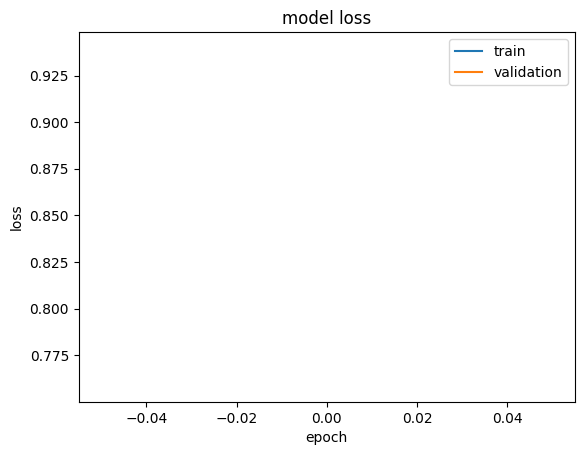

In [ ]:
y_pred = model.predict(X_valid)[:,0]
y_pred = np.where(y_pred<0.5, 0, 1)# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

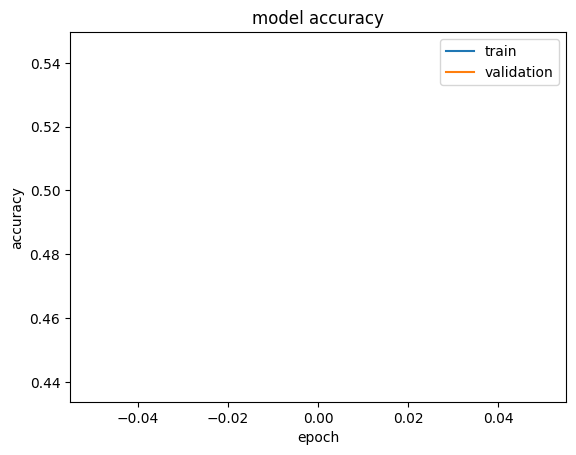

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
y_train_pred = model.predict(X_train)[:,0]
y_train_pred = np.where(y_train_pred<0.5, 0, 1)

In [ ]:
y_pred = model.predict(X_valid)[:,0]
y_pred = np.where(y_pred<0.5, 0, 1)

In [ ]:
print('Training Accuracy: ', accuracy_score(y_train, y_train_pred))
print('\nValidation Accuracy: ', accuracy_score(y_valid, y_pred))